In [1]:
import pandas as pd
from utils.download_kaggle_dataset import download_kaggle_competition
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [2]:
data = download_kaggle_competition("titanic", download_path="titanic_data")
train_df = pd.read_csv(f"{data}/train.csv")
test_df = pd.read_csv(f"{data}/test.csv")

Unzipping files...
Competition data downloaded to: titanic_data


In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Check Missing Values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<Axes: >

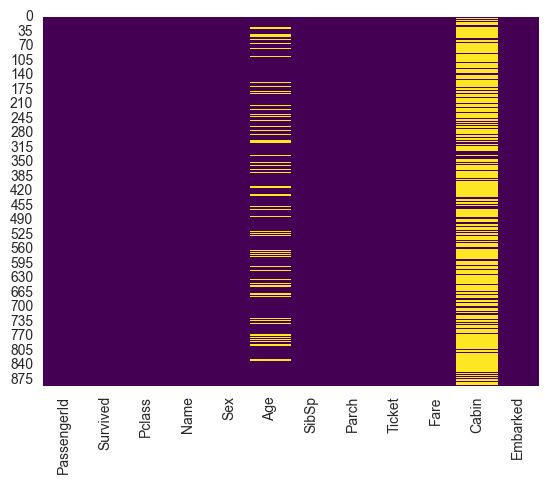

In [6]:
print(train_df.isnull().sum())
sns.heatmap(train_df.isnull(),cbar=False, cmap = "viridis")

#### Target Variable Distribution

<Axes: xlabel='Survived', ylabel='count'>

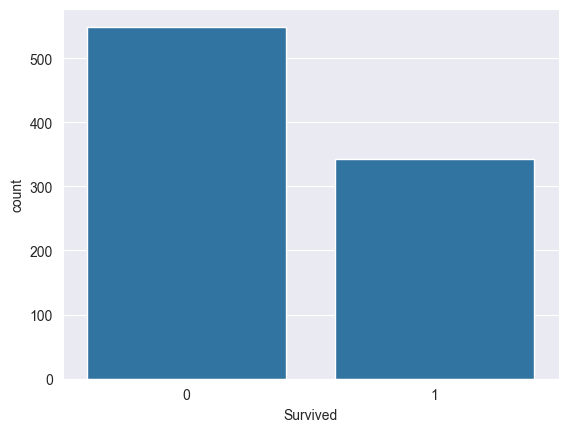

In [7]:
sns.countplot(data=train_df, x = "Survived")


#### Numerical Feature Distributions

Text(0.5, 0.98, 'Histrogram of Nuemarial Features')

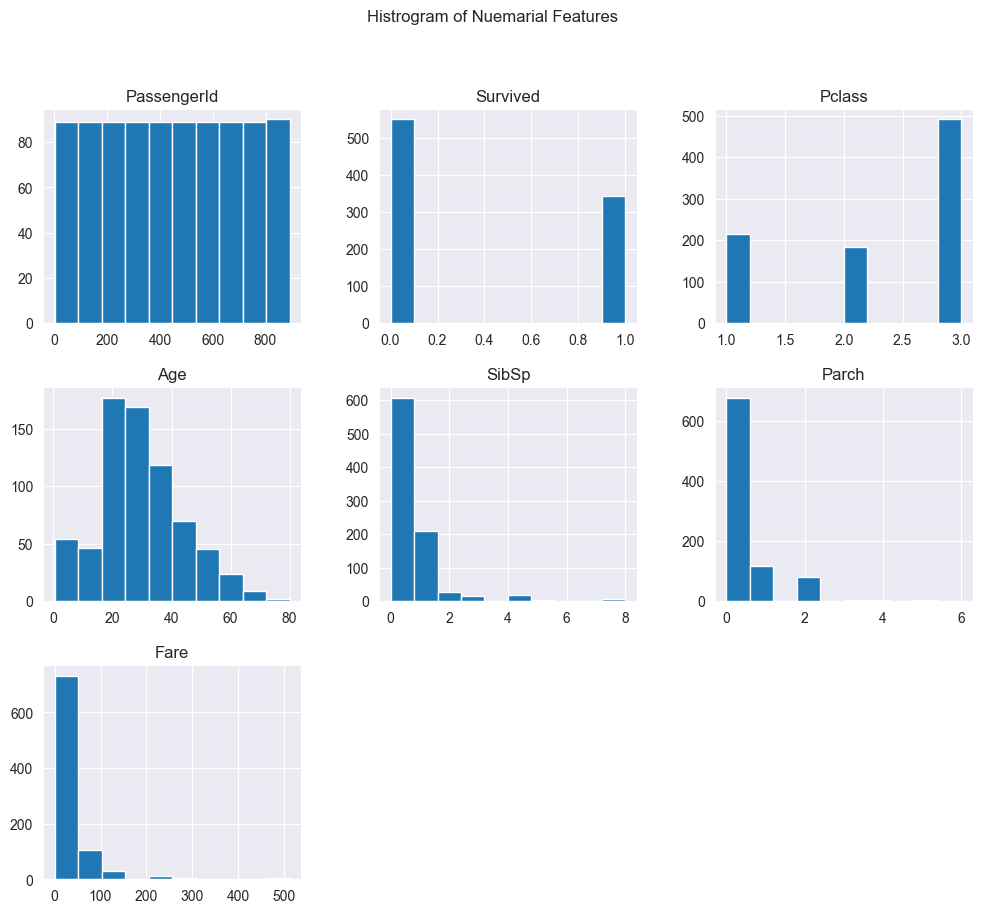

In [8]:
train_df.hist(figsize=(12,10))
plt.suptitle("Histrogram of Nuemarial Features")

#### Categorical Feature Distribution

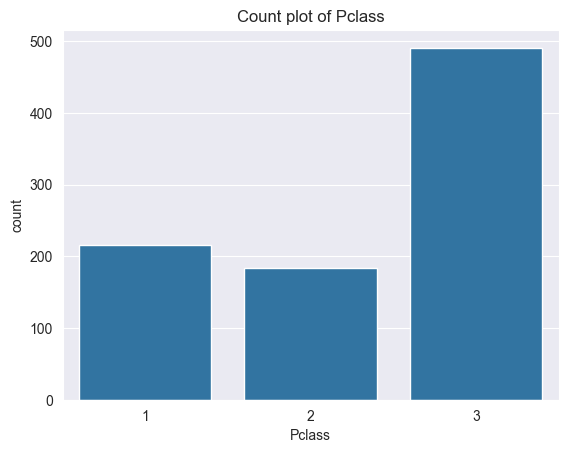

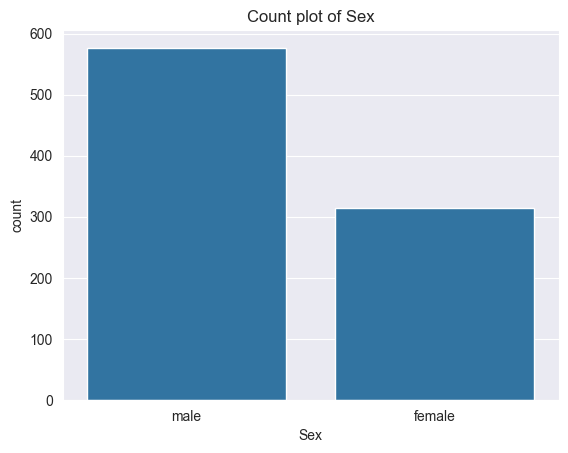

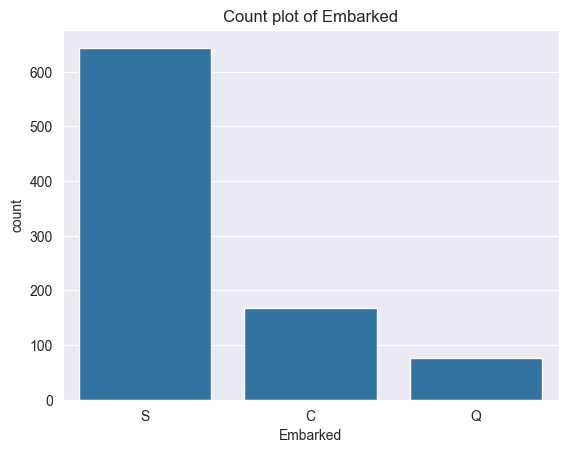

In [9]:
categorical_col = ['Pclass', 'Sex', 'Embarked']
for col in categorical_col:
    sns.countplot(data=train_df, x = col)
    plt.title(f"Count plot of {col}")
    plt.show()

#### Correlation Heatmap

<Axes: >

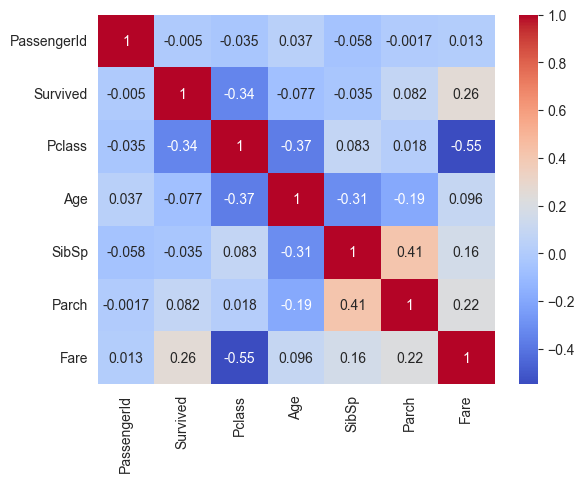

In [10]:
clean_train_df = train_df.corr(numeric_only=True)
sns.heatmap(clean_train_df,annot=True, cmap = 'coolwarm')

#### Survival Rate by Feature#

###### Sex

<Axes: xlabel='Sex', ylabel='Survived'>

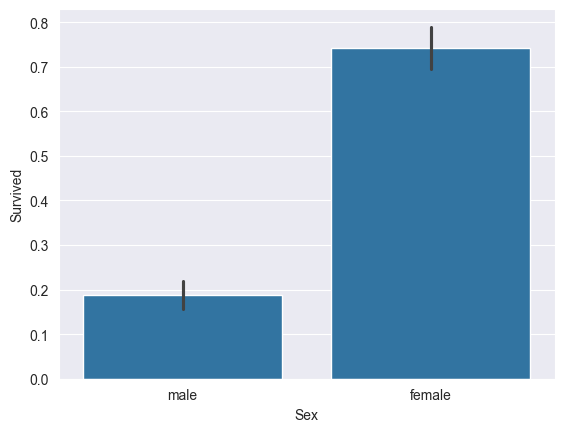

In [11]:
sns.barplot(data=train_df, x = 'Sex', y = 'Survived')

###### Pclass

<Axes: xlabel='Pclass', ylabel='Survived'>

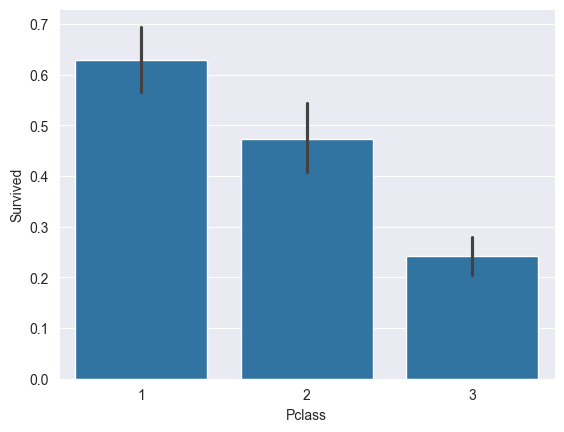

In [12]:
sns.barplot(data = train_df, x = 'Pclass', y = 'Survived')

##### Age

In [13]:
# train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child', 'Teen', 'Adult', 'Middle Age', 'Senior'])
# sns.barplot(data=train_df, x='AgeGroup', y='Survived')


### Grouped survival rate

In [14]:
print(train_df.groupby('Sex')['Survived'].mean())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


#### Cross-tabulation

In [15]:
print(pd.crosstab(train_df['Pclass'], train_df['Survived']))

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


#### Check Target Distribution

In [16]:
train_df['Survived'].value_counts(normalize = True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [17]:
train_df = train_df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])

train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

train_df['Pclass'] = train_df['Pclass'].astype(int)
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

In [18]:
print(X.dtypes)


Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_male         bool
Embarked_Q       bool
Embarked_S       bool
dtype: object


In [19]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    score = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
    print(f"{name}: {score:.4f}")

LogisticRegression: 0.7912
RandomForest: 0.8126


F:\Codes\kaggle-playground\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:32:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
F:\Codes\kaggle-playground\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:32:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
F:\Codes\kaggle-playground\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:32:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost: 0.8148


F:\Codes\kaggle-playground\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:32:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
F:\Codes\kaggle-playground\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:32:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
